In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import Concord as ccd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import time
from pathlib import Path
import torch
proj_name = "concord_treg"
save_dir = f"../save/dev_{proj_name}-{time.strftime('%b%d')}/"
save_dir = Path(save_dir)
save_dir.mkdir(parents=True, exist_ok=True)
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
seed = 0
ccd.ul.set_seed(seed)

In [4]:
data_path = "../data/treg_data/R_treg_graph_ad.h5ad"
adata = sc.read(
    data_path
)
adata.obs['cell_type']=adata.obs['T_subtype_refined'].cat.remove_unused_categories()
adata.obs['batch'] = adata.obs['dataset.ident']
feature_list = ccd.ul.select_features(adata, n_top_features=3000, flavor='seurat_v3')

Concord.utils.feature_selector - INFO - Selecting highly variable features with flavor seurat_v3...


In [24]:
import importlib
importlib.reload(ccd)

<module 'Concord' from '/wynton/home/gartner/zhuqin/.conda/envs/cellpath/lib/python3.9/site-packages/Concord/__init__.py'>

In [27]:
# Initialize Concord with an AnnData object
cur_ccd = ccd.Concord(adata=adata, 
                      input_feature=feature_list, 
                      domain_key='batch', 
                      p_intra_domain = 1.0, 
                      train_frac=0.9,
                      p_intra_knn = 0.3,
                      use_classifier=True,
                      class_key = 'cell_type',
                      device=device, verbose=True)
cur_ccd.encode_adata(input_layer_key='X_log1p', output_key='Concord')

Concord - INFO - Setting sampler_knn to 591 to be 1/50 the number of cells in the dataset. You can change this value by setting sampler_knn in the configuration.
Concord - INFO - Column 'batch' is already of type: category
Concord - INFO - Unused levels dropped for column 'batch'.
Concord - INFO - Column 'cell_type' is already of type: category
Concord - INFO - Unused levels dropped for column 'cell_type'.
Concord - INFO - Encoder input dim: 3000
Concord - INFO - Decoder input dim: 40
Concord - INFO - Classifier input dim: 32
Concord - INFO - Model loaded to device: cuda:2
Concord - INFO - Total number of parameters: 782364
Concord.model.dataloader - INFO - Preprocessing adata...
Concord.utils.preprocessor - INFO - Normalizing total counts ...
Concord.utils.preprocessor - INFO - Log1p transforming ...
Concord.utils.preprocessor - INFO - Filtering features with provided list (3000 features)...
Concord.model.anndataset - INFO - Initialized dataset with 29584 samples. Data structure: ['in

Epoch 0 Training: 461it [00:06, 68.74it/s, loss=5.09]

Concord - INFO - Epoch   0 | Train Loss: 5.27, MSE: 0.46, CLASS: 0.50, CONTRAST: 4.31, IMPORTANCE: 0.00


Concord - INFO - Epoch:   0 | Train accuracy:  0.81 | precision: 0: 0.78, 1: 0.82, 2: 0.83, 3: 0.68 | recall: 0: 0.71, 1: 0.80, 2: 0.91, 3: 0.42 | f1: 0: 0.74, 1: 0.81, 2: 0.87, 3: 0.52
Concord - INFO - Starting epoch 2/5
Concord - INFO - Processing chunk 1/1 for epoch 2
Concord - INFO - Number of samples in train_dataloader: 29584


Epoch 1 Training: 100%|██████████| 461/461 [00:06<00:00, 69.73it/s, loss=5.07]

Concord - INFO - Epoch   1 | Train Loss: 4.81, MSE: 0.37, CLASS: 0.36, CONTRAST: 4.07, IMPORTANCE: 0.00


Concord - INFO - Epoch:   1 | Train accuracy:  0.86 | precision: 0: 0.84, 1: 0.88, 2: 0.88, 3: 0.73 | recall: 0: 0.83, 1: 0.85, 2: 0.92, 3: 0.60 | f1: 0: 0.83, 1: 0.87, 2: 0.90, 3: 0.66
Concord - INFO - Starting epoch 3/5
Concord - INFO - Processing chunk 1/1 for epoch 3
Concord - INFO - Number of samples in train_dataloader: 29584


Epoch 2 Training: 100%|██████████| 461/461 [00:06<00:00, 69.85it/s, loss=4.53]

Concord - INFO - Epoch   2 | Train Loss: 4.62, MSE: 0.36, CLASS: 0.33, CONTRAST: 3.93, IMPORTANCE: 0.00


Concord - INFO - Epoch:   2 | Train accuracy:  0.88 | precision: 0: 0.86, 1: 0.89, 2: 0.89, 3: 0.77 | recall: 0: 0.85, 1: 0.88, 2: 0.93, 3: 0.63 | f1: 0: 0.85, 1: 0.88, 2: 0.91, 3: 0.69
Concord - INFO - Starting epoch 4/5
Concord - INFO - Processing chunk 1/1 for epoch 4
Concord - INFO - Number of samples in train_dataloader: 29584


Epoch 3 Training: 100%|██████████| 461/461 [00:06<00:00, 69.35it/s, loss=4.66]

Concord - INFO - Epoch   3 | Train Loss: 4.54, MSE: 0.35, CLASS: 0.32, CONTRAST: 3.87, IMPORTANCE: 0.00


Concord - INFO - Epoch:   3 | Train accuracy:  0.88 | precision: 0: 0.87, 1: 0.89, 2: 0.89, 3: 0.77 | recall: 0: 0.85, 1: 0.88, 2: 0.93, 3: 0.65 | f1: 0: 0.86, 1: 0.88, 2: 0.91, 3: 0.70
Concord - INFO - Starting epoch 5/5
Concord - INFO - Processing chunk 1/1 for epoch 5
Concord - INFO - Number of samples in train_dataloader: 29584


Epoch 4 Training: 100%|██████████| 461/461 [00:07<00:00, 63.03it/s, loss=4.53]

Concord - INFO - Epoch   4 | Train Loss: 4.49, MSE: 0.35, CLASS: 0.30, CONTRAST: 3.84, IMPORTANCE: 0.00


Concord - INFO - Epoch:   4 | Train accuracy:  0.88 | precision: 0: 0.88, 1: 0.90, 2: 0.89, 3: 0.78 | recall: 0: 0.87, 1: 0.88, 2: 0.93, 3: 0.67 | f1: 0: 0.87, 1: 0.89, 2: 0.91, 3: 0.72
Concord - INFO - Model saved to save/final_model.pth
Concord - INFO - Final model saved at: save/final_model.pth; Configuration saved at: save/config.json.
Concord.model.dataloader - INFO - Preprocessing adata...
Concord.utils.preprocessor - INFO - Normalizing total counts ...
Concord.utils.preprocessor - INFO - Log1p transforming ...
Concord.utils.preprocessor - INFO - Filtering features with provided list (3000 features)...
Concord.model.anndataset - INFO - Initialized dataset with 29584 samples. Data structure: ['input', 'domain', 'class', 'idx']
Concord - INFO - Predicting for chunk 1/1


Concord - INFO - UMAP embedding stored in adata.obsm['Concord_UMAP']


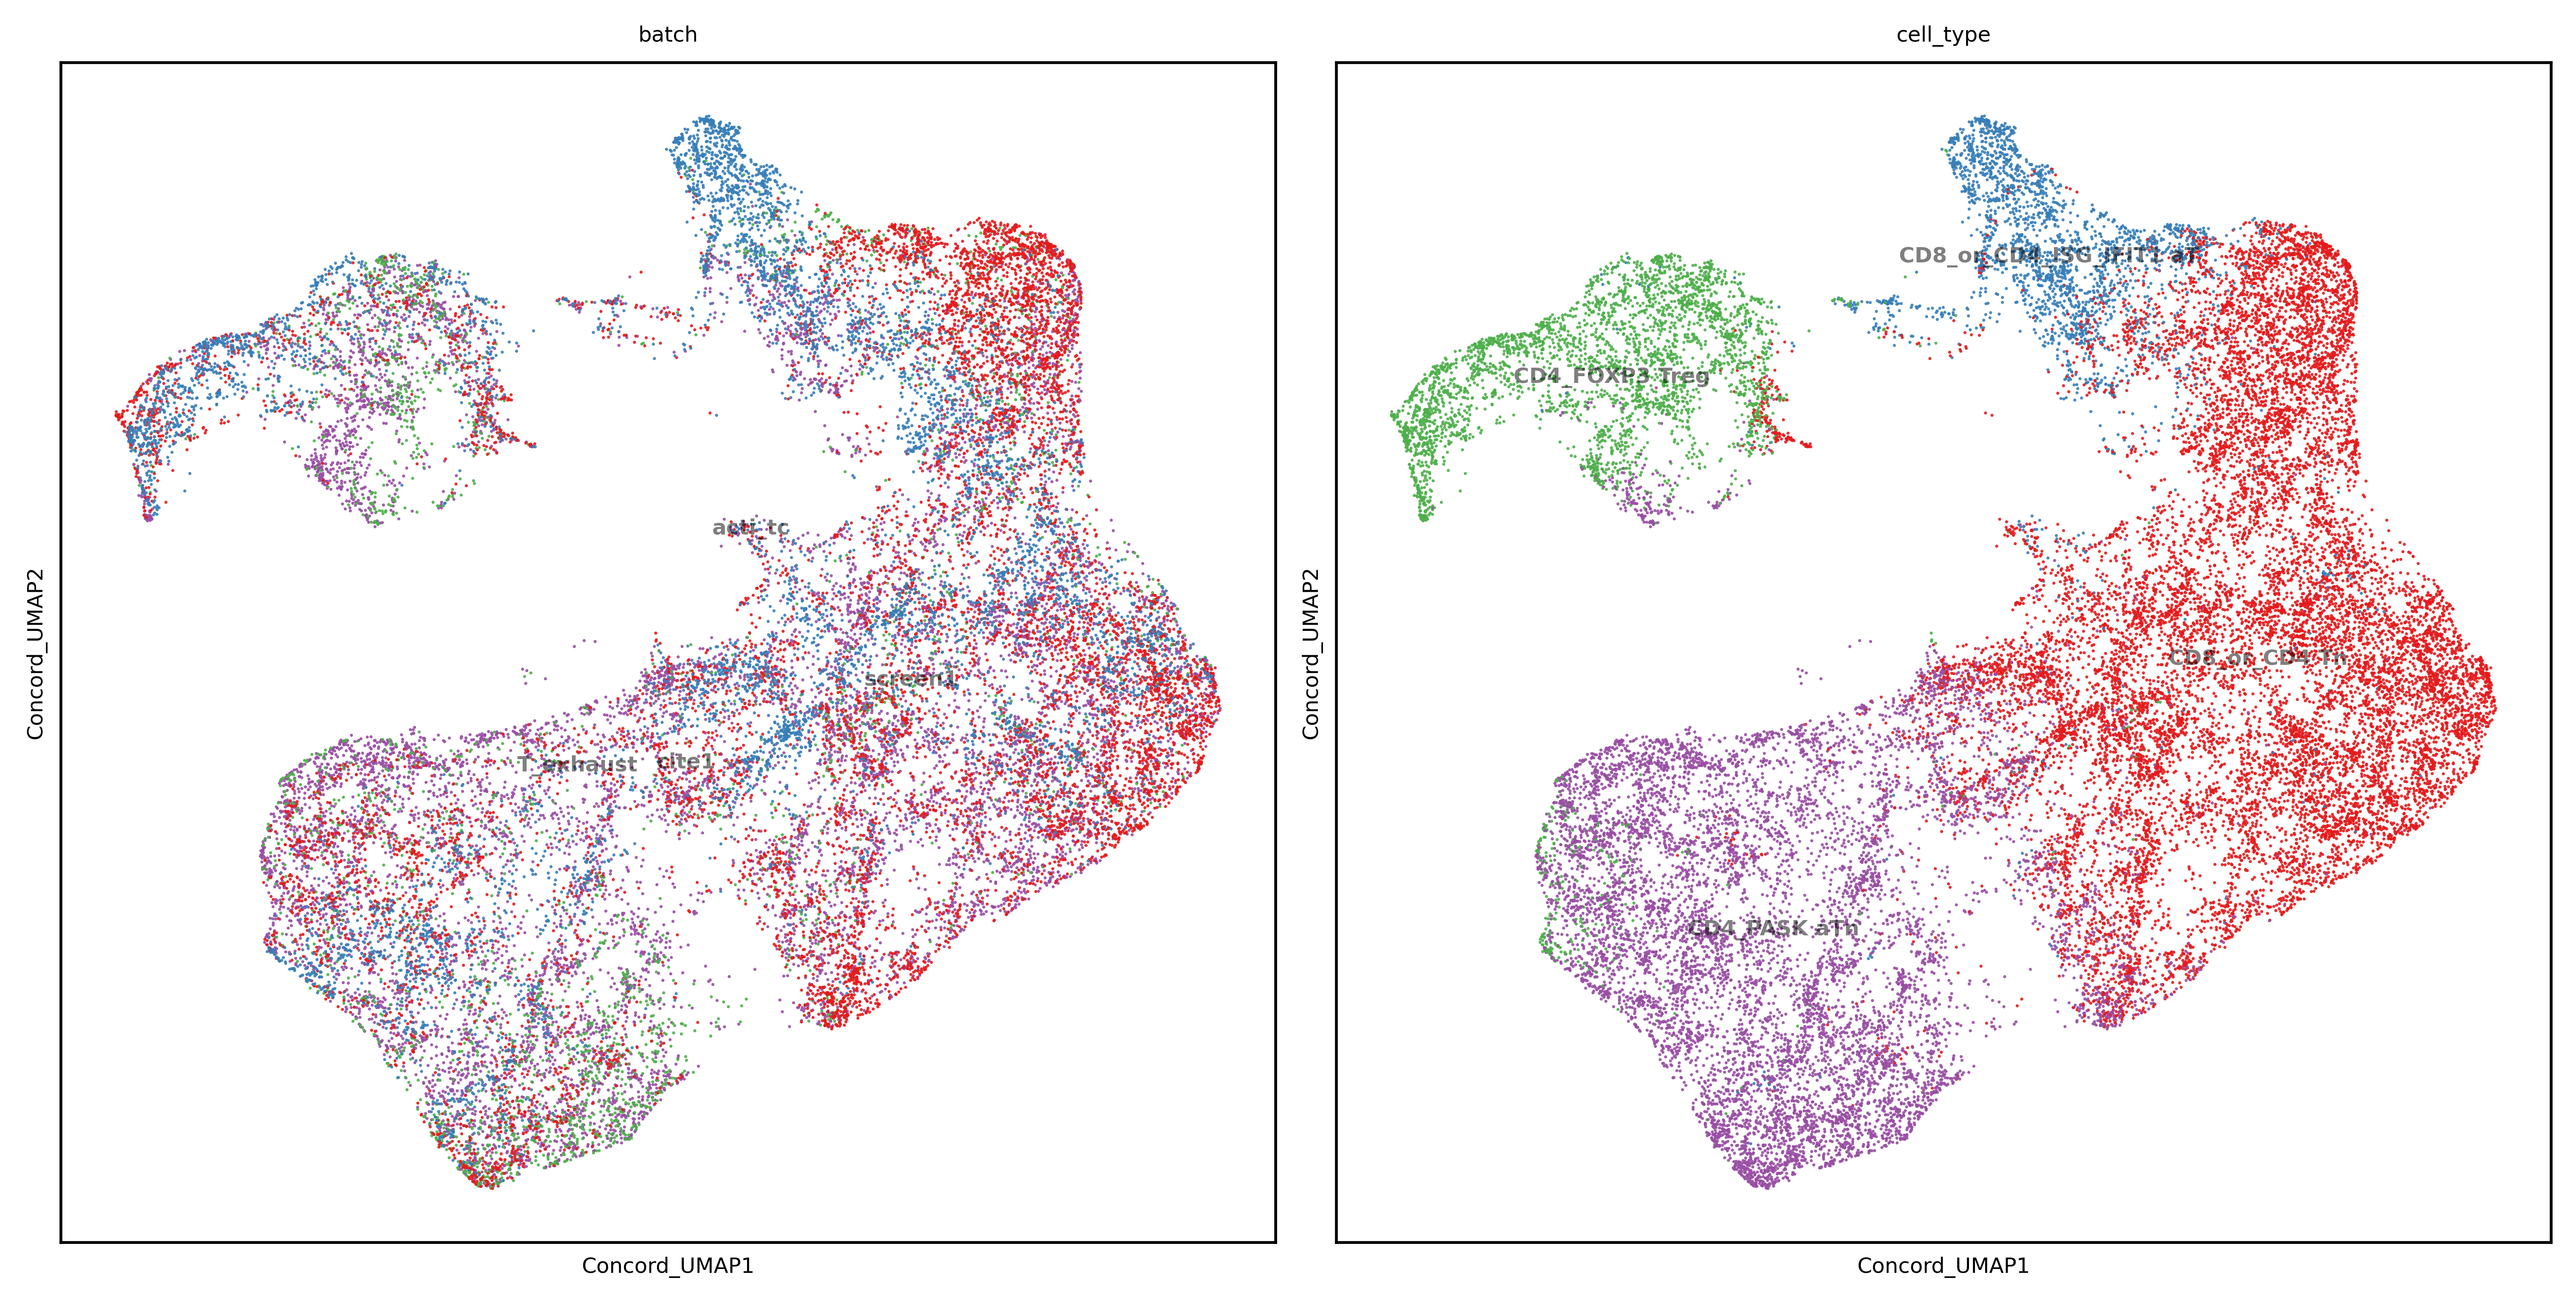

In [28]:
ccd.ul.run_umap(adata, source_key='Concord', umap_key='Concord_UMAP', n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')

# Plot the UMAP embeddings
color_by = ['batch', 'cell_type'] # Choose which variables you want to visualize
ccd.pl.plot_embedding(
    adata, basis='Concord_UMAP', color_by=color_by, figsize=(10, 5), dpi=600, ncols=2, font_size=6, point_size=3, legend_loc='on data',
    save_path='Concord_UMAP.png'
)

In [ ]:
ccd.ul.run_umap(adata, source_key='Concord', umap_key='Concord_UMAP_3D', n_components=3, n_epochs=300, n_neighbors=15, min_dist=0.1, metric='euclidean')

# Plot the 3D UMAP embeddings
col = 'cell_type'
ccd.pl.plot_embedding_3d(
    adata, basis='Concord_UMAP_3D', color_by=col,
    save_path='Concord_UMAP_3D.html',
    point_size=1, opacity=0.8, width=1000, height=800
)

### Enhance with Concord-ant + Leiden

In [ ]:
params = {
    "project_name": proj_name,
    "input_feature": feature_list,
    "batch_size": 64,
    "n_epochs": 5,
    "lr": 1e-3,
    "train_frac": 0.8,
    "latent_dim": 32,
    "encoder_dims": [256],
    "decoder_dims": [256],
    "augmentation_mask_prob": 0.5,
    "dropout_prob": 0.1,
    "use_decoder": True,
    "decoder_weight": 1.0,
    "use_classifier": True,
    "classifier_weight": 1.0,
    "clr_temperature":0.5,
    "domain_embedding_dim":8,
    "use_importance_mask": True,
    "importance_penalty_type": 'L1',
    "importance_penalty_weight": 0,
    "domain_key": 'dataset.ident',
    "class_key": "T_subtype_refined",
    "sampler_emb": "X_pca",
    "sampler_knn": 128,
    "p_intra_knn": 0.5,
    "p_intra_domain": None,
    "min_p_intra_domain": 0.9,
    "pca_n_comps": 50,
    "use_faiss": True,
    "use_ivf": True,
    "ivf_nprobe": 10,
    "inplace": False,
    "save_dir": save_dir,
    "device": device,
    "verbose": True
}
output_key = 'Concordant_class'
cur_ccd = ccd.Concord(adata=adata, **params)
cur_ccd.encode_adata(input_layer_key="X_log1p", output_key=output_key)
obsm_filename = save_dir / f"obsm_{file_suffix}.h5"
ccd.ul.save_obsm_to_hdf5(cur_ccd.adata, obsm_filename)
adata.obsm[output_key] = cur_ccd.adata.obsm[output_key] # If not inplace

In [ ]:
ccd.ul.run_umap(adata, source_key=output_key, umap_key=f'{output_key}_UMAP', n_components=2, n_epochs=500, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=seed, use_cuml=False)
show_cols = ['dataset.ident', 'nFeature_RNA', 'T_subtype_refined', 'leiden']
show_emb = f'{output_key}_UMAP'

ccd.pl.plot_embedding(
    adata, show_emb, show_cols, figsize=(10,8), dpi=600, ncols=2, font_size=6, point_size=3, legend_loc='on data',
    save_path=save_dir / f"embeddings_{show_emb}_{file_suffix}.png"
)


### Enhancing with 1nn contrastive loss

In [ ]:
output_key = "Concord-1nn"
params['sampler_emb'] = "Concord"
params['use_classifier'] = False
params['train_frac'] = 1.0
params['clr_mode'] = 'nn'
params['n_epochs'] = 3
cur_ccd = ccd.Concord(adata=adata, **params)
cur_ccd.encode_adata(input_layer_key="X_log1p", output_key=output_key)
obsm_filename = save_dir / f"obsm_{file_suffix}.h5"
ccd.ul.save_obsm_to_hdf5(cur_ccd.adata, obsm_filename)
adata.obsm[output_key] = cur_ccd.adata.obsm[output_key] # If not inplace

In [ ]:
ccd.ul.run_umap(adata, source_key=output_key, umap_key=f'{output_key}_UMAP', n_components=2, n_epochs=500, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=seed, use_cuml=False)

show_cols = ['dataset.ident', 'nFeature_RNA', 'T_subtype_refined']
adata.obs['T_subtype_refined'] = adata.obs['T_subtype_refined'].cat.remove_unused_categories()
#sc.pp.neighbors(adata, use_rep=f'{output_key}_UMAP')
#sc.tl.leiden(adata, resolution=0.2)
show_emb = f'{output_key}_UMAP'

ccd.pl.plot_embedding(
    adata, show_emb, show_cols, figsize=(10,8), dpi=600, ncols=2, font_size=6, point_size=3, legend_loc='on data',
    save_path=save_dir / f"embeddings_{show_emb}_{file_suffix}.png"
)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
genes_to_load = ["CD3D", "CD8A", "CD4", "CCR6", "CXCR5", "NKG7", "FOXP3", "IL1R1", "GNG8", "UBE2C", 
                 "NOG", "TCF7", "IL6R", "CXCR6","CCL20", "PDE7B", "SLC4A10"]
adata_sub = adata[:, genes_to_load].to_memory()
sc.pp.normalize_total(adata_sub, target_sum=1e4)
sc.pp.log1p(adata_sub)
print(f"loaded {adata_sub.shape[0]} cells and {adata_sub.shape[1]} genes")
# Calculate the 97.5% quantile for each gene
vmax_values = {}
for gene in genes_to_load:
    vmax_values[gene] = np.quantile(adata_sub[:, gene].X.toarray(), 0.995)
show_emb = f'{output_key}_UMAP'
# Plot the gene expression
sc.pl.embedding(
    adata_sub,
    basis=show_emb,
    color=genes_to_load,
    legend_loc='on data',
    frameon=False,
    ncols=3,
    size=8,
    vmax=list(vmax_values.values()),
    cmap='viridis',
    show=False
)
plt.savefig(save_dir / f"gexpr_{show_emb}_{file_suffix}.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


In [ ]:
from Concord.utils.visCello import anndata_to_viscello
anndata_to_viscello(adata, save_dir / f"cello_{proj_name}_adata_{file_suffix}", project_name = proj_name, organism='hsa')